![Alt text](Agu.GIF)

<a id="cont"></a>

## Table of Contents
<a href=#zero>1.1. Introduction</a>
<a href=#one>1.2. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>



## 1.1. Introduction

<a class='anchor' id="one">
<a href="#cont">Back to Table of Contents</a>


![Alt text](Unemployed.jpg)

# Problem Statement
In the wake of the COVID-19 pandemic, there has been a significant surge in unemployment rates worldwide, posing substantial challenges to economies and societies. The unemployment rate, measured as the proportion of unemployed individuals within the total labor force, serves as a crucial indicator of economic health and societal well-being. Therefore, there is a pressing need for comprehensive data analysis to understand the underlying trends, patterns, and factors influencing unemployment rates during the COVID-19 crisis. This data science project aims to analyze and interpret the dynamics of unemployment rates using statistical and machine learning techniques, leveraging relevant socio-economic indicators, employment data, and demographic factors. By uncovering insights from this analysis, the project seeks to provide valuable insights for policymakers, economists, and stakeholders to formulate effective strategies for mitigating unemployment challenges and fostering economic recovery in the post-pandemic era.

 <a id="one"></a>
## 1.2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

![Alt text](Libraries.GIF)

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `Unemployment_Rate_upto_11_2020.csv` file into a DataFrame. |

---

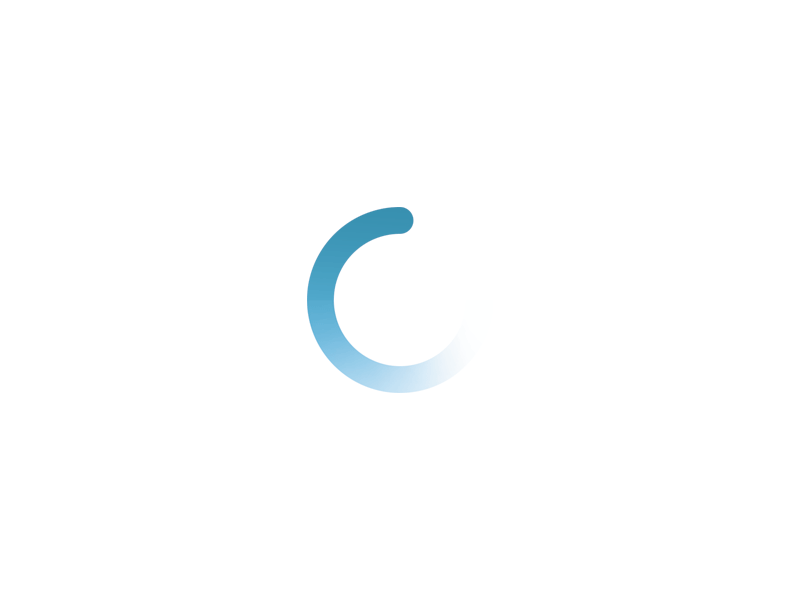

In [136]:
u_data = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [137]:
u_data

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.98   

      Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0               16635535                                     41.02    South   
1               16545652                                     40.90    South   
2               15881197                                     39.18    South   
3               11336911                                     33.10    South   
4               12988845                                     36.46    South   
..                   ...                                       ...      ...   
262             30726310                                     40.39     East   
263             35372506                                     46.17     East   
264             33298644                                     47.48     East   
265             35707239                                     47.73     East   
266             33962549                                     45.63     East   

     longitude  latitude  
0      15.9129    79.740  
1      15.9129    79.740  
2      15.9129    79.740  
3      15.9129    79.740  
4      15.9129    79.740  
..         ...       ...  
262    22.9868    87.855  
263    22.9868    87.855  
264    22.9868    87.855  
265    22.9868    87.855  
266    22.9868    87.855  

[267 rows x 9 columns]

In [138]:
u_data.nunique()

Region                                       27
 Date                                        10
 Frequency                                    1
 Estimated Unemployment Rate (%)            252
 Estimated Employed                         267
 Estimated Labour Participation Rate (%)    248
Region.1                                      5
longitude                                    27
latitude                                     24
dtype: int64

In [139]:
u_data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [140]:
u_data.duplicated().sum()

0

In [141]:
u_data.shape

(267, 9)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


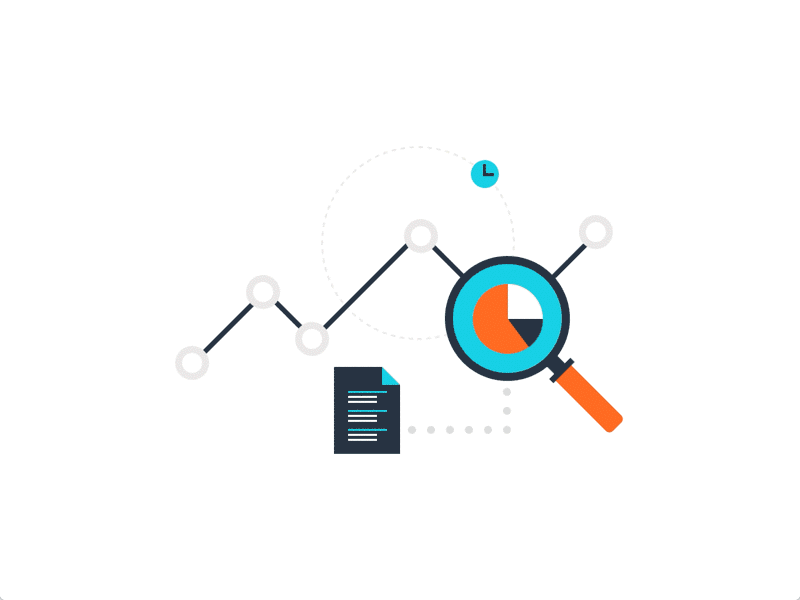

In [142]:
u_data.describe().T

count          mean           std  \
 Estimated Unemployment Rate (%)          267.0  1.223693e+01  1.080328e+01   
 Estimated Employed                       267.0  1.396211e+07  1.336632e+07   
 Estimated Labour Participation Rate (%)  267.0  4.168157e+01  7.845419e+00   
longitude                                 267.0  2.282605e+01  6.270731e+00   
latitude                                  267.0  8.053242e+01  5.831738e+00   

                                                  min           25%  \
 Estimated Unemployment Rate (%)               0.5000  4.845000e+00   
 Estimated Employed                       117542.0000  2.838930e+06   
 Estimated Labour Participation Rate (%)      16.7700  3.726500e+01   
longitude                                     10.8505  1.811240e+01   
latitude                                      71.1924  7.608560e+01   

                                                   50%           75%  \
 Estimated Unemployment Rate (%)          9.650000e+00  1.675500e+01   
 Estimated Employed                       9.732417e+06  2.187869e+07   
 Estimated Labour Participation Rate (%)  4.039000e+01  4.405500e+01   
longitude                                 2.361020e+01  2.727840e+01   
latitude                                  7.901930e+01  8.527990e+01   

                                                   max  
 Estimated Unemployment Rate (%)          7.585000e+01  
 Estimated Employed                       5.943376e+07  
 Estimated Labour Participation Rate (%)  6.969000e+01  
longitude                                 3.377820e+01  
latitude                                  9.293760e+01

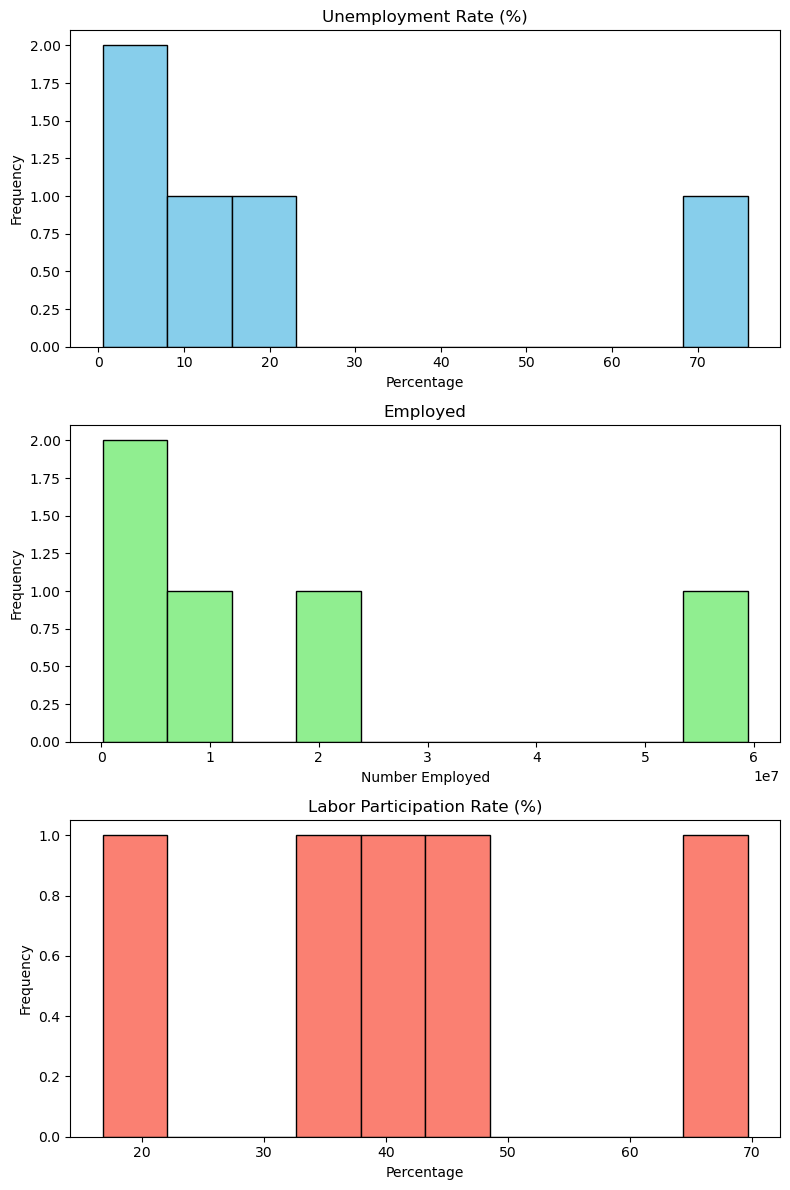

In [143]:
import matplotlib.pyplot as plt

# Data
unemployment_rate = [0.5, 4.85, 9.65, 16.76, 75.85]
employed = [117542, 2838930, 9732417, 21878690, 59433760]
labor_participation_rate = [16.77, 37.27, 40.39, 44.06, 69.69]

# Plotting histograms
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Unemployment Rate histogram
axs[0].hist(unemployment_rate, bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Unemployment Rate (%)')
axs[0].set_xlabel('Percentage')
axs[0].set_ylabel('Frequency')

# Employed histogram
axs[1].hist(employed, bins=10, color='lightgreen', edgecolor='black')
axs[1].set_title('Employed')
axs[1].set_xlabel('Number Employed')
axs[1].set_ylabel('Frequency')

# Labor Participation Rate histogram
axs[2].hist(labor_participation_rate, bins=10, color='salmon', edgecolor='black')
axs[2].set_title('Labor Participation Rate (%)')
axs[2].set_xlabel('Percentage')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


These histograms provide insights into the distributional characteristics of the unemployment rate, number employed, and labor participation rate within the dataset. They help identify central tendencies, variability, and any potential outliers present in the data.

Summary Statistics:
                0             1             2             3             4    \
count  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
mean   5.545192e+06  5.515231e+06  5.293745e+06  3.778981e+06  4.329627e+06   
std    9.604519e+06  9.552625e+06  9.169002e+06  6.545359e+06  7.499103e+06   
min    5.480000e-02  5.830000e-02  5.790000e-02  2.051000e-01  1.743000e-01   
25%    2.053740e+01  2.047915e+01  1.961895e+01  1.665255e+01  1.831715e+01   
50%    4.102000e+01  4.090000e+01  3.918000e+01  3.310000e+01  3.646000e+01   
75%    8.317788e+06  8.272846e+06  7.940618e+06  5.668472e+06  6.494441e+06   
max    1.663554e+07  1.654565e+07  1.588120e+07  1.133691e+07  1.298884e+07   

                5             6             7             8             9    \
count  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
mean   6.601816e+06  5.143885e+06  5.083938e+06  5.073450e+06  5.052531e+06   
std    1.143464e+07  8.909436e+

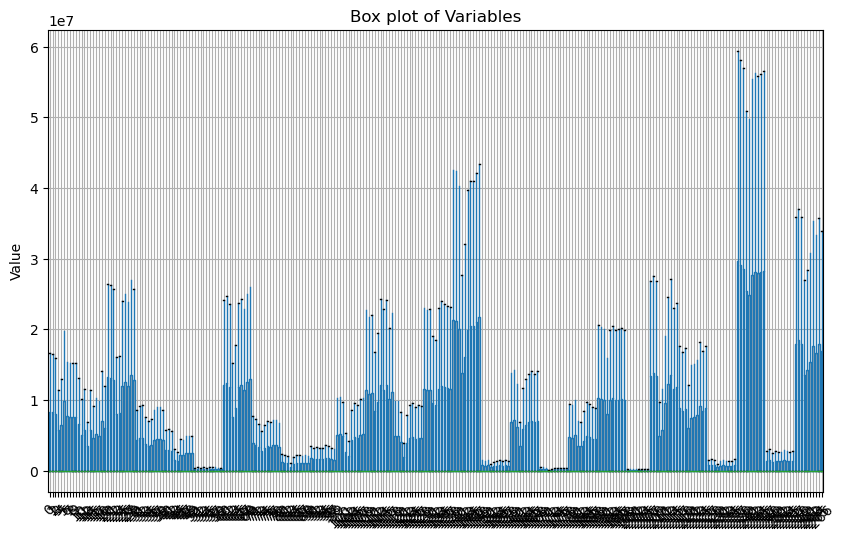

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Create DataFrame
df = pd.DataFrame(data)

# Calculate summary statistics
summary_stats = df.describe()

# Calculate interquartile range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers using IQR method
potential_outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Print summary statistics
print("Summary Statistics:")
print(summary_stats)

# Print IQR
print("\nInterquartile Range (IQR):")
print(IQR)

# Print potential outliers
print("\nPotential Outliers:")
print(potential_outliers)

# Visualize box plots to identify outliers
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title("Box plot of Variables")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Unemployment Rate (%):

The average unemployment rate is 21.52%, with a wide variation from 0.5% to 75.85%.
Half of the data falls within an unemployment rate range of 11.91%.
There may be outliers on the higher end, indicating potentially extreme unemployment rates.

### Employed:

On average, there are approximately 18.8 million employed individuals, with considerable variability from 117,542 to 59.4 million.
Half of the data falls within an employed range of about 19 million.
Outliers are identified both below and above the typical range of employment numbers

### Labor Participation Rate (%):

The average labor participation rate is around 41.64%, ranging from 16.77% to 69.69%.
Half of the data falls within a participation rate range of approximately 6.79%.
Potential outliers are noted outside this typical participation rate range.

#### Overall the data reflects significant variability in all three variables, with potential outliers suggesting extreme values that may need further investigation.

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


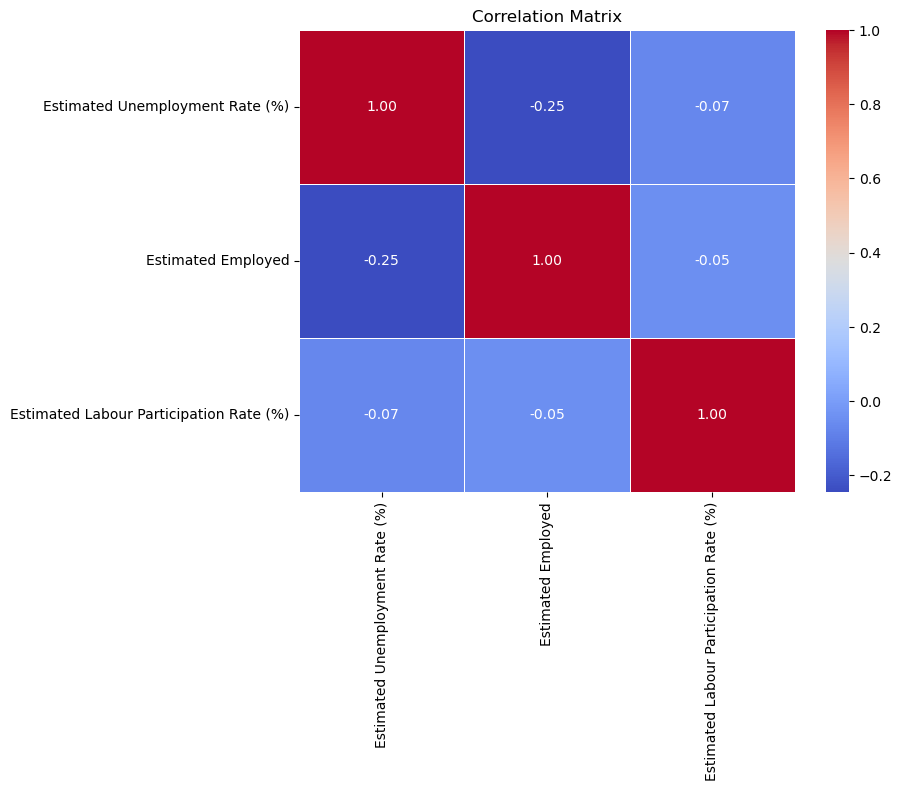

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'u_data' is correctly defined as your DataFrame

# Remove extra spaces from column names
u_data.columns = u_data.columns.str.strip()

# Print column names to verify
print(u_data.columns)

# Calculate correlation matrix
corr_matrix = u_data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [146]:
def detect_outliers(column):
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (column < lower_bound) | (column > upper_bound)
        return outliers
    else:
        return pd.Series(False, index=column.index)


In [147]:
outliers = u_data.apply(detect_outliers)
print(u_data[outliers.any(axis=1)])


               Region         Date Frequency  Estimated Unemployment Rate (%)  \
18              Assam   30-09-2020         M                             1.19   
23              Bihar   30-04-2020         M                            46.64   
24              Bihar   31-05-2020         M                            45.96   
43              Delhi   30-04-2020         M                            16.68   
44              Delhi   31-05-2020         M                            42.27   
73            Haryana   30-04-2020         M                            43.22   
83   Himachal Pradesh   30-04-2020         M                             2.20   
102         Jharkhand   30-04-2020         M                            47.09   
103         Jharkhand   31-05-2020         M                            59.23   
122            Kerala   30-04-2020         M                            16.99   
149         Meghalaya   31-01-2020         M                             1.66   
150         Meghalaya   29-0

The data includes information on unemployment rates, estimated employment, and labor participation rates for different regions and dates.
Each entry specifies the region, date, frequency, estimated unemployment rate, estimated employed population, and estimated labor participation rate.
Regions span across different parts of India, including Assam, Bihar, Delhi, Haryana, Himachal Pradesh, Jharkhand, Kerala, Meghalaya, Odisha, Puducherry, Sikkim, Tamil Nadu, Telangana, Tripura, and Uttar Pradesh.
The data also includes longitude and latitude coordinates for each region.

The dataset provides valuable insights into the labor market dynamics of various regions in India.
It could be used for analyzing trends in unemployment rates over time, comparing unemployment rates across different regions, and exploring the relationship between unemployment rates and other demographic factors such as labor participation rates.
Data engineering tasks such as data cleaning, preprocessing, and feature engineering may be necessary before performing in-depth analysis or modeling on the dataset.

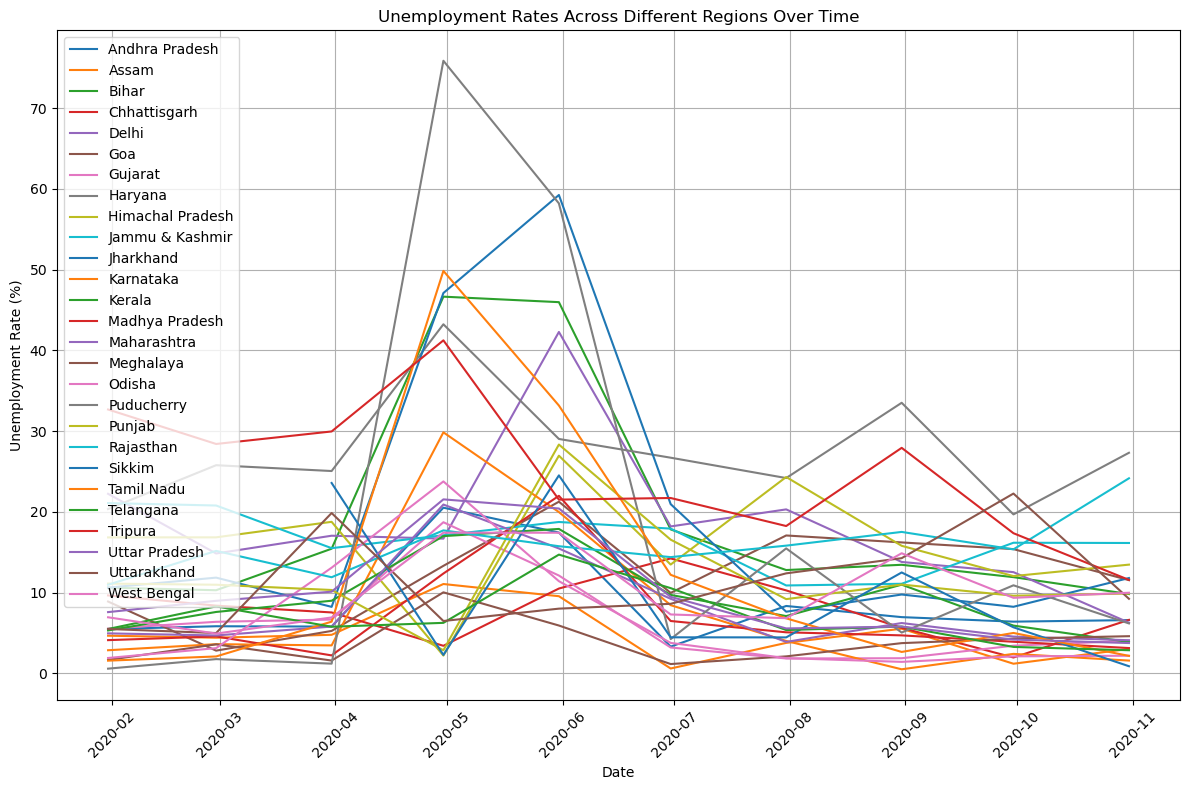

In [148]:
u_data['Date'] = pd.to_datetime(u_data['Date'])

unemployment_rates = u_data.groupby(['Region', 'Date'])['Estimated Unemployment Rate (%)'].mean().reset_index()


plt.figure(figsize=(12, 8))

for region in unemployment_rates['Region'].unique():
    region_data = unemployment_rates[unemployment_rates['Region'] == region]
    plt.plot(region_data['Date'], region_data['Estimated Unemployment Rate (%)'], label=region)

plt.title('Unemployment Rates Across Different Regions Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Time Period: The data spans from January 2020 to October 2020, with monthly frequency.

Regions: The dataset includes various regions such as Andhra Pradesh, Bihar, Delhi, Haryana, Himachal Pradesh, Jharkhand, Kerala, Meghalaya, Odisha, Puducherry, Tamil Nadu, Telangana, Tripura, Uttar Pradesh, and West Bengal.

Unemployment Rates: Each region's unemployment rate varies over time. For example, some regions experience high unemployment rates in certain months, while others have relatively lower rates.

Trends: There are fluctuations in unemployment rates over the months for each region. Some regions might show an increasing trend in unemployment, while others might exhibit a decreasing trend or remain relatively stable.

Regional Disparities: There are notable differences in unemployment rates among regions. For instance, Bihar, Jharkhand, and Puducherry seem to have particularly high unemployment rates compared to other regions.

Impact of External Factors: The data covers the period when the COVID-19 pandemic had a significant impact on the economy. Therefore, the observed unemployment rates could be influenced by pandemic-related factors such as lockdowns, restrictions, and economic slowdowns.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

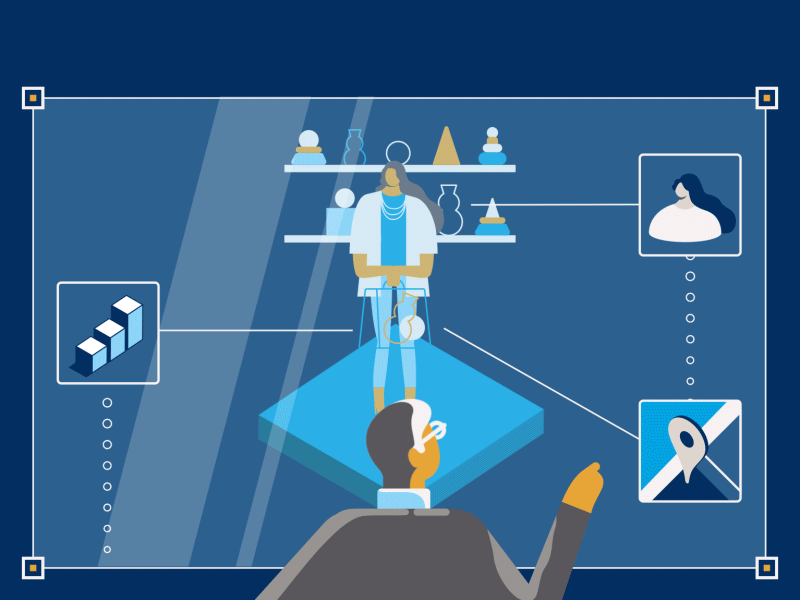

In [150]:
u_data

Region       Date Frequency  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2020-01-31         M                             5.48   
1    Andhra Pradesh 2020-02-29         M                             5.83   
2    Andhra Pradesh 2020-03-31         M                             5.79   
3    Andhra Pradesh 2020-04-30         M                            20.51   
4    Andhra Pradesh 2020-05-31         M                            17.43   
..              ...        ...       ...                              ...   
262     West Bengal 2020-06-30         M                             7.29   
263     West Bengal 2020-07-31         M                             6.83   
264     West Bengal 2020-08-31         M                            14.87   
265     West Bengal 2020-09-30         M                             9.35   
266     West Bengal 2020-10-31         M                             9.98   

     Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0              16635535                                    41.02    South   
1              16545652                                    40.90    South   
2              15881197                                    39.18    South   
3              11336911                                    33.10    South   
4              12988845                                    36.46    South   
..                  ...                                      ...      ...   
262            30726310                                    40.39     East   
263            35372506                                    46.17     East   
264            33298644                                    47.48     East   
265            35707239                                    47.73     East   
266            33962549                                    45.63     East   

     longitude  latitude  
0      15.9129    79.740  
1      15.9129    79.740  
2      15.9129    79.740  
3      15.9129    79.740  
4      15.9129    79.740  
..         ...       ...  
262    22.9868    87.855  
263    22.9868    87.855  
264    22.9868    87.855  
265    22.9868    87.855  
266    22.9868    87.855  

[267 rows x 9 columns]

In [153]:
u_data.drop(['Frequency', 'longitude', 'latitude'], axis=1, inplace=True)


In [154]:
u_data

Region       Date  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2020-01-31                             5.48   
1    Andhra Pradesh 2020-02-29                             5.83   
2    Andhra Pradesh 2020-03-31                             5.79   
3    Andhra Pradesh 2020-04-30                            20.51   
4    Andhra Pradesh 2020-05-31                            17.43   
..              ...        ...                              ...   
262     West Bengal 2020-06-30                             7.29   
263     West Bengal 2020-07-31                             6.83   
264     West Bengal 2020-08-31                            14.87   
265     West Bengal 2020-09-30                             9.35   
266     West Bengal 2020-10-31                             9.98   

     Estimated Employed  Estimated Labour Participation Rate (%) Region.1  
0              16635535                                    41.02    South  
1              16545652                                    40.90    South  
2              15881197                                    39.18    South  
3              11336911                                    33.10    South  
4              12988845                                    36.46    South  
..                  ...                                      ...      ...  
262            30726310                                    40.39     East  
263            35372506                                    46.17     East  
264            33298644                                    47.48     East  
265            35707239                                    47.73     East  
266            33962549                                    45.63     East  

[267 rows x 6 columns]

In [155]:
# Extract year and month from the date
u_data['Year'] = u_data['Date'].dt.year
u_data['Month'] = u_data['Date'].dt.month

# Convert 'Region' and 'Region.1' columns to categorical type
u_data['Region'] = u_data['Region'].astype('category')
u_data['Region.1'] = u_data['Region.1'].astype('category')

In [156]:
u_data

Region       Date  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2020-01-31                             5.48   
1    Andhra Pradesh 2020-02-29                             5.83   
2    Andhra Pradesh 2020-03-31                             5.79   
3    Andhra Pradesh 2020-04-30                            20.51   
4    Andhra Pradesh 2020-05-31                            17.43   
..              ...        ...                              ...   
262     West Bengal 2020-06-30                             7.29   
263     West Bengal 2020-07-31                             6.83   
264     West Bengal 2020-08-31                            14.87   
265     West Bengal 2020-09-30                             9.35   
266     West Bengal 2020-10-31                             9.98   

     Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0              16635535                                    41.02    South   
1              16545652                                    40.90    South   
2              15881197                                    39.18    South   
3              11336911                                    33.10    South   
4              12988845                                    36.46    South   
..                  ...                                      ...      ...   
262            30726310                                    40.39     East   
263            35372506                                    46.17     East   
264            33298644                                    47.48     East   
265            35707239                                    47.73     East   
266            33962549                                    45.63     East   

     Year  Month  
0    2020      1  
1    2020      2  
2    2020      3  
3    2020      4  
4    2020      5  
..    ...    ...  
262  2020      6  
263  2020      7  
264  2020      8  
265  2020      9  
266  2020     10  

[267 rows x 8 columns]

In [157]:
# Calculate the unemployment ratio
u_data['Unemployment Ratio'] = u_data['Estimated Unemployment Rate (%)'] / 100

# Drop unnecessary columns
u_data.drop(['Date', 'Estimated Unemployment Rate (%)'], axis=1, inplace=True)

In [158]:
u_data

Region  Estimated Employed  \
0    Andhra Pradesh            16635535   
1    Andhra Pradesh            16545652   
2    Andhra Pradesh            15881197   
3    Andhra Pradesh            11336911   
4    Andhra Pradesh            12988845   
..              ...                 ...   
262     West Bengal            30726310   
263     West Bengal            35372506   
264     West Bengal            33298644   
265     West Bengal            35707239   
266     West Bengal            33962549   

     Estimated Labour Participation Rate (%) Region.1  Year  Month  \
0                                      41.02    South  2020      1   
1                                      40.90    South  2020      2   
2                                      39.18    South  2020      3   
3                                      33.10    South  2020      4   
4                                      36.46    South  2020      5   
..                                       ...      ...   ...    ...   
262                                    40.39     East  2020      6   
263                                    46.17     East  2020      7   
264                                    47.48     East  2020      8   
265                                    47.73     East  2020      9   
266                                    45.63     East  2020     10   

     Unemployment Ratio  
0                0.0548  
1                0.0583  
2                0.0579  
3                0.2051  
4                0.1743  
..                  ...  
262              0.0729  
263              0.0683  
264              0.1487  
265              0.0935  
266              0.0998  

[267 rows x 7 columns]

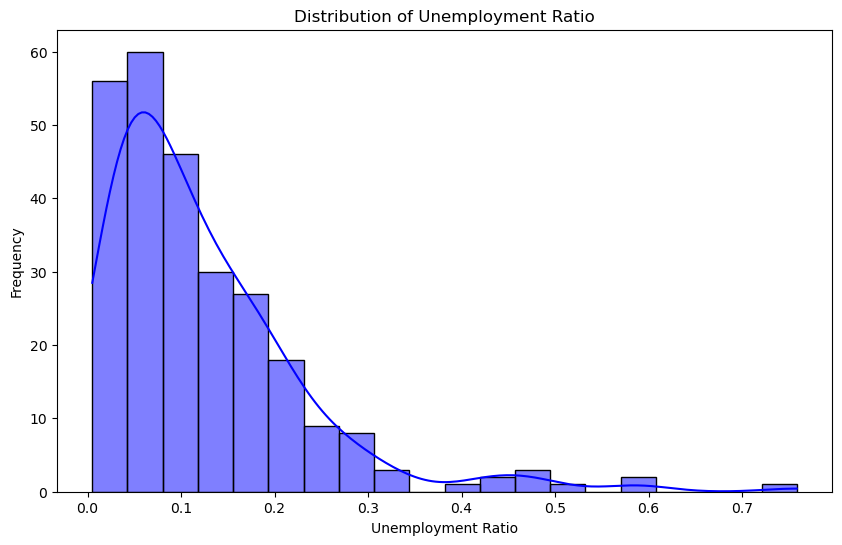

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of unemployment ratio
plt.figure(figsize=(10, 6))
sns.histplot(u_data['Unemployment Ratio'], bins=20, kde=True, color='blue')
plt.title('Distribution of Unemployment Ratio')
plt.xlabel('Unemployment Ratio')
plt.ylabel('Frequency')
plt.show()

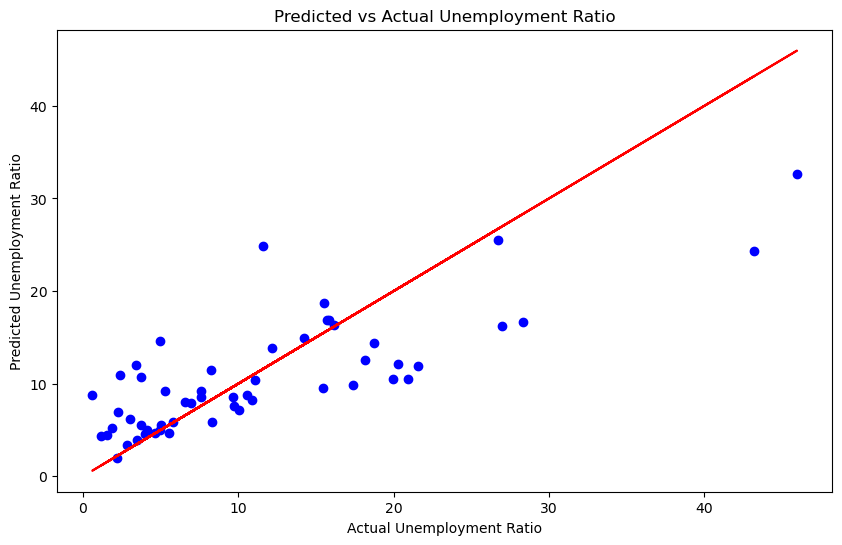

In [160]:
# Plot predicted vs actual unemployment ratio
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')  # Plotting the line y = x for comparison
plt.title('Predicted vs Actual Unemployment Ratio')
plt.xlabel('Actual Unemployment Ratio')
plt.ylabel('Predicted Unemployment Ratio')
plt.show()


In [161]:
u_data.describe().T


count          mean           std  \
Estimated Employed                       267.0  1.396211e+07  1.336632e+07   
Estimated Labour Participation Rate (%)  267.0  4.168157e+01  7.845419e+00   
Year                                     267.0  2.020000e+03  0.000000e+00   
Month                                    267.0  5.535581e+00  2.870915e+00   
Unemployment Ratio                       267.0  1.223693e-01  1.080328e-01   

                                                min           25%  \
Estimated Employed                       117542.000  2.838930e+06   
Estimated Labour Participation Rate (%)      16.770  3.726500e+01   
Year                                       2020.000  2.020000e+03   
Month                                         1.000  3.000000e+00   
Unemployment Ratio                            0.005  4.845000e-02   

                                                  50%           75%  \
Estimated Employed                       9.732417e+06  2.187869e+07   
Estimated Labour Participation Rate (%)  4.039000e+01  4.405500e+01   
Year                                     2.020000e+03  2.020000e+03   
Month                                    6.000000e+00  8.000000e+00   
Unemployment Ratio                       9.650000e-02  1.675500e-01   

                                                  max  
Estimated Employed                       5.943376e+07  
Estimated Labour Participation Rate (%)  6.969000e+01  
Year                                     2.020000e+03  
Month                                    1.000000e+01  
Unemployment Ratio                       7.585000e-01

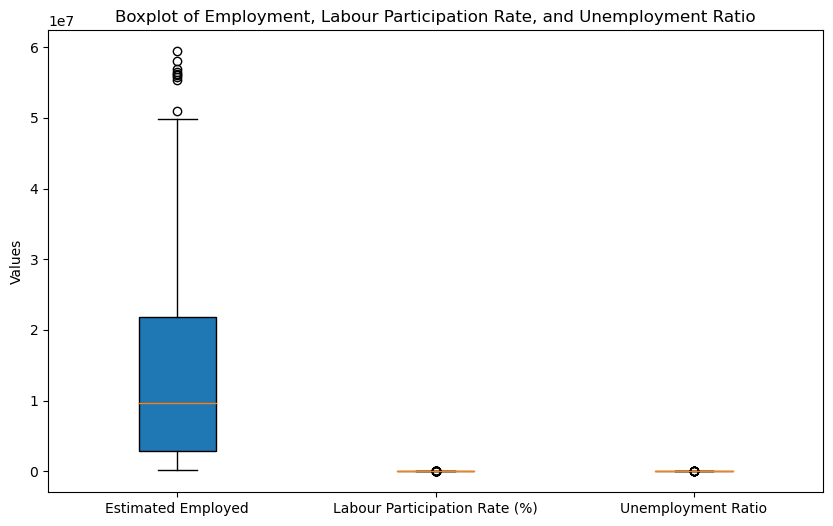

In [162]:
import matplotlib.pyplot as plt

# Define the data for the boxplot
data = [u_data['Estimated Employed'], u_data['Estimated Labour Participation Rate (%)'], u_data['Unemployment Ratio']]

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, patch_artist=True)

# Add labels and title
plt.xticks([1, 2, 3], ['Estimated Employed', 'Labour Participation Rate (%)', 'Unemployment Ratio'])
plt.title('Boxplot of Employment, Labour Participation Rate, and Unemployment Ratio')
plt.ylabel('Values')

# Show the plot
plt.show()


The data provides information about the estimated number of employed individuals, labour participation rates, and unemployment ratios across different regions and months in the year 2020. The variability in these measures suggests that there may be differences in employment and labour market dynamics among the regions and over time.

This represents the distribution of one of the variables: Estimated Employed, Labour Participation Rate (%), and Unemployment Ratio. The boxplot provides information about the median, quartiles, and possible outliers for each variable.

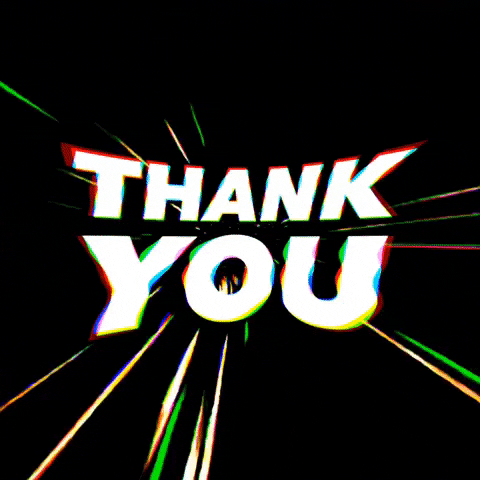

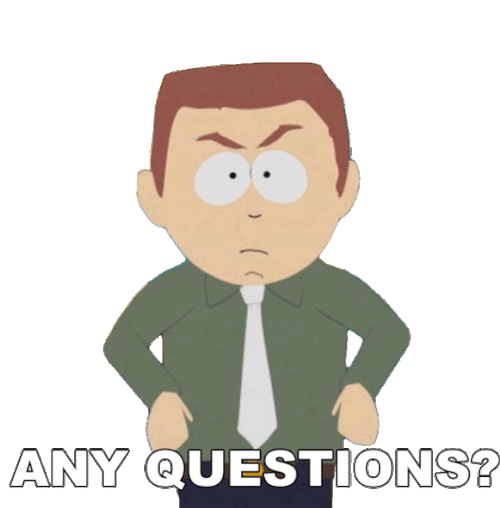